In [1]:
%matplotlib notebook


### training for self-consistent equilibrium phase diagram: s-wave equilibrium phase diagram

0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001


<IPython.core.display.Javascript object>


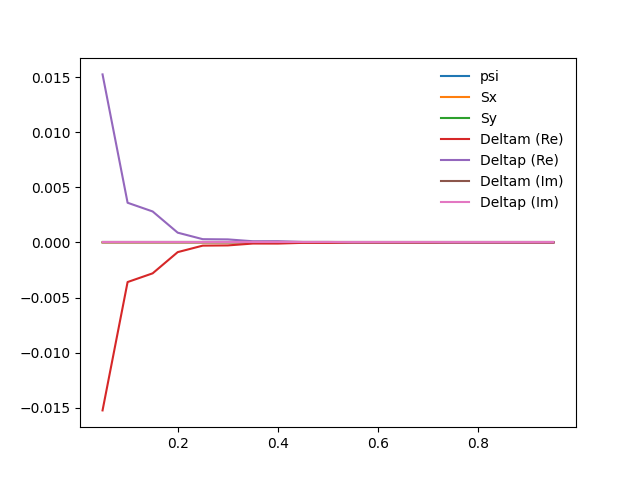

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

# procedure
# 1. we fix a certain equilibrium gap modulus Delta0
# 2. we fix a certain photon-matter coupling g
# 3. the algorithm looks for the chemical potential mu and photon frequency omega such that this condition
# can be satisfied.

# another possibility - fix omega and g and find the chemical potential and mu - maybe more reasonable


# number of sites
L = 100

# I fix a certain symmetry sector given by the total Sz

Sz = 0

# I consider the adiabatically eliminated regime: thus, I don't fix the chemical potential keeping track
# of the number of photons in the system
# I measure everything in units of chi = g^2/chi (thus, we have as free parameters the band width W/chi)
# W/chi < 1 weak disorder - W/chi > strong disorder (roughly)
omega_photon = 1
g = 1
W = 0.05
W_j = np.linspace(-W/2,W/2,L)

# I have to find the chemical potential and the gap which satisfies this condition


b1  = np.random()
b0  = 1/np.sqrt(2)
bm1 = 1/2 

# epsilon = 1E-3
# b1  = 0
# bm1 = 1 - epsilon
# b0  = np.sqrt(1-bm1**2)



Deltap = b1 * np.conj(b0)
Deltam = b0 * np.conj(bm1)
Deltax = b1 * np.conj(bm1)
n1  = np.abs(b1)**2
n0  = np.abs(b0)**2
nm1 = np.abs(bm1)**2

C_t0 = np.array([[n1,np.conj(Deltap),np.conj(Deltax)],[Deltap,n0,np.conj(Deltam)],[Deltax,Deltam,nm1]])

psi_list = []
Sx_list = []
Sy_list = []
Sz_list = []
n1_list = []
n0_list = []
nm1_list = []
Deltap_list = []
Deltam_list = []

for W in W_list:
    print(W)
#     h = np.linspace(-W/2,W/2,L)
    h = np.full(L,W)
    C = C_t0
    psi_t0  = -1* (gp * C[1,0] + gm * C[2,1]) / omega_photon
    psid_t0 = np.conj(psi_t0)
    converged = False
    psi = psi_t0
    psid = psid_t0
    while True:
        
        for j in range(L):
            hj = h[j]
            
            Hj = [[hj,psi*gp,0],[psid*gp,0,psi*gm],[0,psid*gm,-hj]]
            eigenvalue , eigenvector = np.linalg.eigh(Hj)
            Cj = np.outer(eigenvector[0],np.conj(eigenvector[0]))
            C  = C*(1-1/L) + Cj/L
            psi  = -1* (gp * C[1,0] + gm * C[2,1]) / omega_photon
            psid = np.conj(psi)
            Sx = 2*np.real(C[1,0]+C[2,1])
            Sy = 2*np.imag(C[1,0]-C[2,1])
            Sz = C[0,0]-C[2,2]
            Sxp = np.real(C[1,0])
            Sxm = np.real(C[2,1])
        if np.abs(np.abs(psi) - np.abs(psi_t0)) < 1E-3/L:
            psi_list.append(psi)
            Sx_list.append(Sx)
            Sy_list.append(Sy)  
            Sz_list.append(Sz)
            n1_list.append(np.real(C[0,0]))
            n0_list.append(np.real(C[1,1]))
            nm1_list.append(np.real(C[2,2]))
            
            Deltap_list.append(C[1,0])
            Deltam_list.append(C[2,1]
                              )
            
            

            converged = True
            break
        else:
#             print('Iteration')

            psi_t0 = psi
        if converged:
            break
        
n1_list = np.array(n1_list)
n0_list = np.array(n0_list)
nm1_list = np.array(nm1_list)
N = n1_list + n0_list + nm1_list
plt.plot(W_list,np.abs(psi_list),linestyle='-',label='psi')
plt.plot(W_list,Sx_list,linestyle='-',label='Sx')
plt.plot(W_list,Sy_list,linestyle='-',label='Sy')
# plt.plot(W_list,Sz_list,linestyle='-',label='Sz')
# plt.plot(W_list,n1_list,linestyle='-',label='n1')
# plt.plot(W_list,n0_list,linestyle='-',label='n0')
# plt.plot(W_list,nm1_list,linestyle='-',label='nm1')
plt.plot(W_list,np.real(Deltam_list),linestyle='-',label='Deltam (Re)')
plt.plot(W_list,np.real(Deltap_list),linestyle='-',label='Deltap (Re)')
plt.plot(W_list,np.imag(Deltam_list),linestyle='-',label='Deltam (Im)')
plt.plot(W_list,np.imag(Deltap_list),linestyle='-',label='Deltap (Im)')
# plt.plot(W_list,np.abs(Deltam_list),linestyle='-',label='Deltam (abs)')
# plt.plot(W_list,np.abs(Deltap_list),linestyle='-',label='Deltap (abs)')
# plt.plot(omega_p_list,N,linestyle='-')
# plt.yscale('log')
plt.legend(frameon=False,loc='best')

0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001


<IPython.core.display.Javascript object>


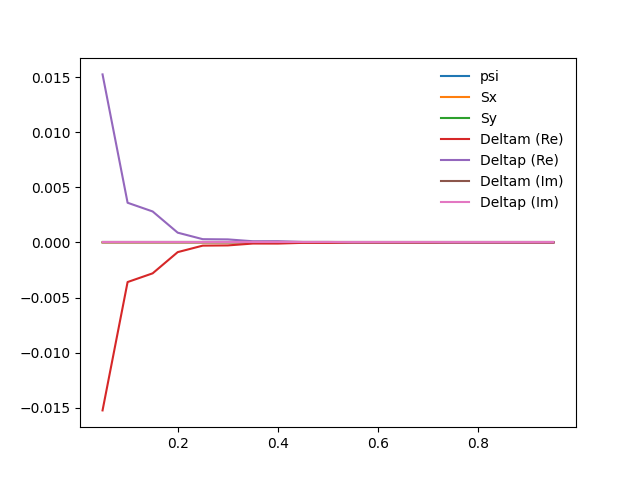

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

omega_photon = 1
theta = math.pi/4
L=10000
gp = np.sqrt(omega_photon) * np.cos(theta)
gm = np.sqrt(omega_photon) * np.sin(theta)

W_list = list( j * 0.05 for j in range(1,20))
# W_list = [0.001,0.1,0.2,0.3,0.4,0.5,1,5]
# W_list = [0.001,0.1,0.2,0.3,0.4,0.5,1,5]

same_W = 1

# fix symmetry sector (initial state)
# I fix the symmetry sector with Sz = 0 (the same of the initial state from which we start)

b1  = 1/2
b0  = 1/np.sqrt(2)
bm1 = 1/2 

# epsilon = 1E-3
# b1  = 0
# bm1 = 1 - epsilon
# b0  = np.sqrt(1-bm1**2)



Deltap = b1 * np.conj(b0)
Deltam = b0 * np.conj(bm1)
Deltax = b1 * np.conj(bm1)
n1  = np.abs(b1)**2
n0  = np.abs(b0)**2
nm1 = np.abs(bm1)**2

C_t0 = np.array([[n1,np.conj(Deltap),np.conj(Deltax)],[Deltap,n0,np.conj(Deltam)],[Deltax,Deltam,nm1]])

psi_list = []
Sx_list = []
Sy_list = []
Sz_list = []
n1_list = []
n0_list = []
nm1_list = []
Deltap_list = []
Deltam_list = []

for W in W_list:
    print(W)
#     h = np.linspace(-W/2,W/2,L)
    h = np.full(L,W)
    C = C_t0
    psi_t0  = -1* (gp * C[1,0] + gm * C[2,1]) / omega_photon
    psid_t0 = np.conj(psi_t0)
    converged = False
    psi = psi_t0
    psid = psid_t0
    while True:
        
        for j in range(L):
            hj = h[j]
            
            Hj = [[hj,psi*gp,0],[psid*gp,0,psi*gm],[0,psid*gm,-hj]]
            eigenvalue , eigenvector = np.linalg.eigh(Hj)
            Cj = np.outer(eigenvector[0],np.conj(eigenvector[0]))
            C  = C*(1-1/L) + Cj/L
            psi  = -1* (gp * C[1,0] + gm * C[2,1]) / omega_photon
            psid = np.conj(psi)
            Sx = 2*np.real(C[1,0]+C[2,1])
            Sy = 2*np.imag(C[1,0]-C[2,1])
            Sz = C[0,0]-C[2,2]
            Sxp = np.real(C[1,0])
            Sxm = np.real(C[2,1])
        if np.abs(np.abs(psi) - np.abs(psi_t0)) < 1E-3/L:
            psi_list.append(psi)
            Sx_list.append(Sx)
            Sy_list.append(Sy)  
            Sz_list.append(Sz)
            n1_list.append(np.real(C[0,0]))
            n0_list.append(np.real(C[1,1]))
            nm1_list.append(np.real(C[2,2]))
            
            Deltap_list.append(C[1,0])
            Deltam_list.append(C[2,1]
                              )
            
            

            converged = True
            break
        else:
#             print('Iteration')

            psi_t0 = psi
        if converged:
            break
        
n1_list = np.array(n1_list)
n0_list = np.array(n0_list)
nm1_list = np.array(nm1_list)
N = n1_list + n0_list + nm1_list
plt.plot(W_list,np.abs(psi_list),linestyle='-',label='psi')
plt.plot(W_list,Sx_list,linestyle='-',label='Sx')
plt.plot(W_list,Sy_list,linestyle='-',label='Sy')
# plt.plot(W_list,Sz_list,linestyle='-',label='Sz')
# plt.plot(W_list,n1_list,linestyle='-',label='n1')
# plt.plot(W_list,n0_list,linestyle='-',label='n0')
# plt.plot(W_list,nm1_list,linestyle='-',label='nm1')
plt.plot(W_list,np.real(Deltam_list),linestyle='-',label='Deltam (Re)')
plt.plot(W_list,np.real(Deltap_list),linestyle='-',label='Deltap (Re)')
plt.plot(W_list,np.imag(Deltam_list),linestyle='-',label='Deltam (Im)')
plt.plot(W_list,np.imag(Deltap_list),linestyle='-',label='Deltap (Im)')
# plt.plot(W_list,np.abs(Deltam_list),linestyle='-',label='Deltam (abs)')
# plt.plot(W_list,np.abs(Deltap_list),linestyle='-',label='Deltap (abs)')
# plt.plot(omega_p_list,N,linestyle='-')
# plt.yscale('log')
plt.legend(frameon=False,loc='best')

In [29]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A[1,2])

6


[[0.25       0.35355339 0.25      ]
 [0.35355339 0.5        0.35355339]
 [0.25       0.35355339 0.25      ]]
0.9999999999999999
0.001
0.1
0.2
0.3
0.4
0.5
1
2
3
4
5
6
7
8
9
10


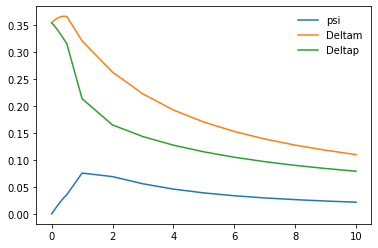

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

omega_photon = 1
theta = math.pi/4
L=5000
gp = np.sqrt(omega_photon) * np.cos(theta)
gm = np.sqrt(omega_photon) * np.sin(theta)
W_list = list( j * 0.3 for j in range(1,10))
W_list = [0.001,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9,10]
same_W = 1

# fix symmetry sector (initial state)
np.random.seed(1)
b0   = np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
bm1  = np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
b1   = np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
norm = np.sqrt(np.abs(bm1)**2 + np.abs(b0)**2 + np.abs(b1)**2)
b0  /= norm
bm1 /= norm
b1  /= norm

b1  = 1/2
b0  = 1/np.sqrt(2)
bm1 = 1/2

Deltap = b1 * np.conj(b0)
Deltam = b0 * np.conj(bm1)
Deltax = b1 * np.conj(bm1)
n1  = np.abs(b1)**2
n0  = np.abs(b0)**2
nm1 = np.abs(bm1)**2

C_t0 = np.array([[n1,np.conj(Deltap),np.conj(Deltax)],[Deltap,n0,np.conj(Deltam)],[Deltax,Deltam,nm1]])

print(C_t0)
eigenvalue , _ = np.linalg.eigh(C_t0)
print(np.sum(eigenvalue))

psi_list = []
Sx_list = []
Sy_list = []
Sz_list = []
n1_list = []
n0_list = []
nm1_list = []
Deltap_list = []
Deltam_list = []

for W in W_list:
    print(W)
#     np.random.seed(1)
#     omega_p_list = np.random.uniform(-W/2,+W/2,L)
    omega_p_list = np.linspace(-W/2,W/2,L)
    if np.abs(same_W) == 1:
        omega_m_list  = -1 * same_W * omega_p_list
    else:
        omega_m_list = np.random.uniform(-W/2,W/2,L)
    
    C = C_t0
    psi_t0  = -1* (gp * C[1,0] + gm * C[2,1]) / omega_photon
    psid_t0 = np.conj(psi_t0)
    converged = False
    
    while True:
        
        for j in range(L):
            omega_p = omega_p_list[j]
            omega_m = omega_m_list[j]
            
            Hj = [[omega_p,psi_t0*gp,0],[psid_t0*gp,0,psi_t0*gm],[0,psid_t0*gm,omega_m]]
            eigenvalue , eigenvector = np.linalg.eigh(Hj)
#             U = eigenvector
#             Udag = np.conj(np.transpose(U))
#             Lambda = Udag @ Hj @ U
            Cj = np.outer(eigenvector[0],np.conj(eigenvector[0]))
            C  = C*(1-1/L) + Cj/L
            psi = -1*(gp * C[1,0] + gm * C[2,1])/omega_photon
            Sx = 2*np.real(C[1,0]+C[2,1])
            Sy = 2*np.imag(C[1,0]-C[2,1])
            Sy = 2*np.imag(C[1,0]+C[2,1])
            Sz = C[0,0]-C[2,2]
        if np.abs(np.abs(psi) - np.abs(psi_t0)) < 1E-3/L:
            psi_list.append(psi)
            Sx_list.append(Sx)
            Sy_list.append(Sy)  
            Sz_list.append(Sz)
            n1_list.append(np.real(C[0,0]))
            n0_list.append(np.real(C[1,1]))
            nm1_list.append(np.real(C[2,2]))
            Deltap_list.append(np.abs(C[1,0]))
            Deltam_list.append(np.abs(C[2,1]))

            converged = True
            break
        else:
            psi_t0 = psi
        
        if converged:
            break
        
n1_list = np.array(n1_list)
n0_list = np.array(n0_list)
nm1_list = np.array(nm1_list)
N = n1_list + n0_list + nm1_list
# print(psi_list)
plt.plot(W_list,np.abs(psi_list),linestyle='-',label='psi')
# # plt.plot(omega_p_list,Sx_list,linestyle='-',color='tab:green')
# # plt.plot(omega_p_list,Sy_list,linestyle='-',color='tab:blue')
# plt.plot(W_list,Sz_list,linestyle='-',label='Sz')
# plt.plot(W_list,n1_list,linestyle='-',label='n1')
# plt.plot(W_list,n0_list,linestyle='-',label='n0')
# plt.plot(W_list,nm1_list,linestyle='-',label='nm1')
plt.plot(W_list,Deltam_list,linestyle='-',label='Deltam')
plt.plot(W_list,Deltap_list,linestyle='-',label='Deltap')

# plt.plot(omega_p_list,N,linestyle='-')
plt.legend(frameon=False)

In [12]:
np.sin(math.pi/4)**2

0.4999999999999999

In [8]:
import numpy as np
import matplotlib.pyplot as plt

omega_photon = 1
gp = 1
gm = 1
omega_p_list = list( j * 0.01 for j in range(0,200))

# fix symmetry sector
Deltap = 1/2
Deltam = 1/2



psi_list = []
Sx_list = []
Sy_list = []
Sz_list = []
n1_list = []
n0_list = []
nm1_list = []
for omega_p in omega_p_list:
    omega_m = -omega_p
    psi = -1*(gp * Deltap + gm * Deltam)/omega_photon
    psid = np.conj(psi)
    counter = 0
    while True:
        counter += 1
        Hj = [[omega_p,psi*gp,0],[psid*gp,0,psi*gm],[0,psid*gm,omega_m]]
        eigenvalue , eigenvector = np.linalg.eigh(Hj)
        U = eigenvector
        Udag = np.conj(np.transpose(U))
        Lambda = Udag @ Hj @ U
        C = np.outer(eigenvector[0],np.conj(eigenvector[0]))
#         print(C)
#         C = Udag @ [[1,0,0],[0,0,0],[0,0,0]] @ U
#         print(C)

#         break
        psi_new = -1*(gp * C[1,0] + gm * C[2,1])/omega_photon
        Sx = 2*np.real(C[1,0]+C[2,1])
#         Sy = 2*np.imag(C[1,0]-C[2,1])
        Sy = 2*np.imag(C[1,0]+C[2,1])
        Sz = C[0,0]-C[2,2]
        if np.abs(np.abs(psi_new) - np.abs(psi)) < 1E-3:
            psi_list.append(psi_new)
            Sx_list.append(Sx)
            Sy_list.append(Sy)  
            Sz_list.append(Sz)
            n1_list.append(np.real(C[0,0]))
            n0_list.append(np.real(C[1,1]))
            nm1_list.append(np.real(C[2,2]))
            break
        else:
            psi = psi_new
            psid = np.conj(psi_new)
            
n1_list = np.array(n1_list)
n0_list = np.array(n0_list)
nm1_list = np.array(nm1_list)
N = n1_list + n0_list + nm1_list
plt.plot(omega_p_list,np.abs(psi_list),linestyle='-',color='tab:red',label='psi')
# plt.plot(omega_p_list,Sx_list,linestyle='-',color='tab:green')
# plt.plot(omega_p_list,Sy_list,linestyle='-',color='tab:blue')
# plt.plot(omega_p_list,Sz_list,linestyle='-',color='tab:orange')
plt.plot(omega_p_list,n1_list,linestyle='-',label='n1')
plt.plot(omega_p_list,n0_list,linestyle='-',label='n0')
plt.plot(omega_p_list,nm1_list,linestyle='-',label='nm1')
# plt.plot(omega_p_list,N,linestyle='-')
plt.legend(frameon=False)

KeyboardInterrupt: 

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0
1.01
1.02
1.03
1.04
1.05
1.06
1.07
1.08
1.09
1.1
1.11
1.12
1.1300000000000001
1.1400000000000001
1.1500000000000001
1.16
1.17
1.18
1.19
1.2
1.21
1.22
1.23
1.24
1.25
1.26
1.27
1.28
1.29
1.3
1.31
1.32
1.33
1.34
1.35
1.36
1.37
1.3800000000000001
1.3900000000000001
10


<IPython.core.display.Javascript object>


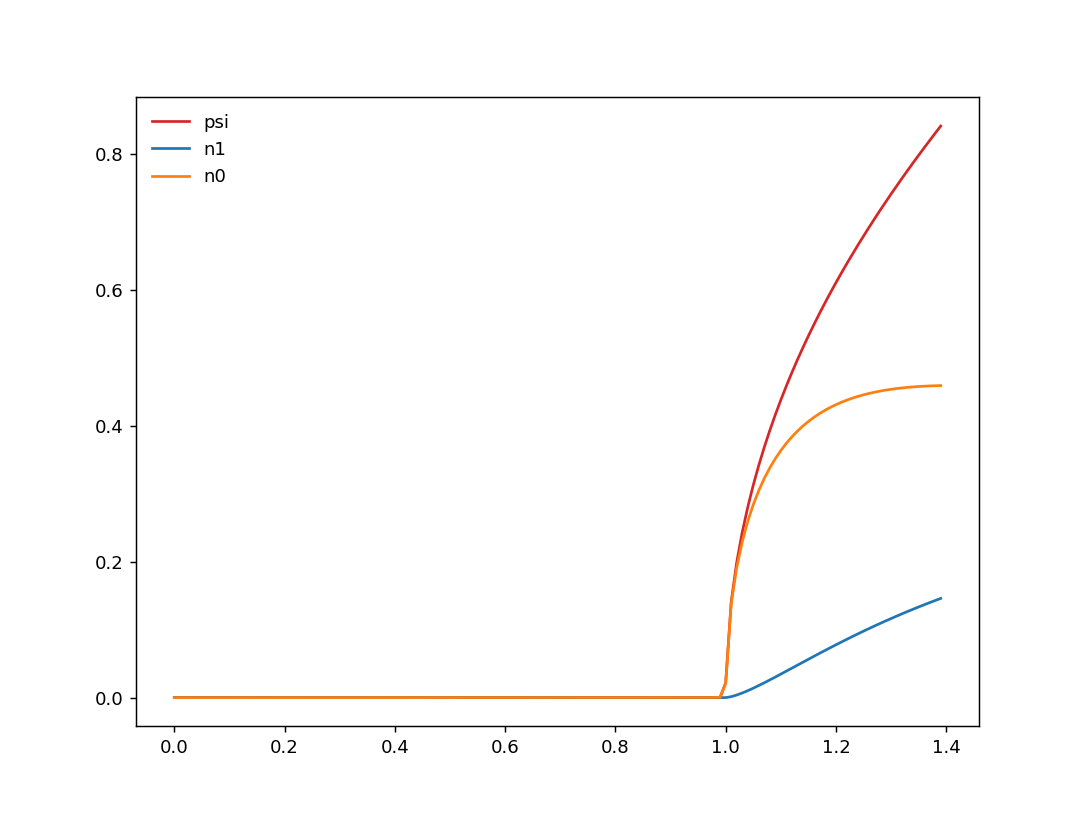

In [35]:
import numpy as np
import matplotlib.pyplot as plt

omega_photon = 1
g_list = list( j * 0.01 for j in range(0,140))
g_list += [10]
# g_list = [0.1,0.5,0.9,0.95,0.96,0.97,0.98,0.99,1.01,1.02,1.05,1.1,1.2,1.3,1.5]
# fix symmetry sector
np.random.seed(1)
b0   = np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
bm1  = np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
b1   = np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
norm = np.sqrt(np.abs(bm1)**2 + np.abs(b0)**2 + np.abs(b1)**2)
b0  /= norm
bm1 /= norm
b1  /= norm

Deltap = b1 * np.conj(b0)
Deltam = b0 * np.conj(bm1)
Deltax = b1 * np.conj(bm1)
n1  = np.abs(b1)**2
n0  = np.abs(b0)**2
nm1 = np.abs(bm1)**2

C_t0 = np.array([[n1,np.conj(Deltap),np.conj(Deltax)],[Deltap,n0,np.conj(Deltam)],[Deltax,Deltam,nm1]])


omega_p = 1
omega_m = -1

psi_list = []
Sx_list = []
Sy_list = []
Sz_list = []
n1_list = []
n0_list = []
nm1_list = []
for g in g_list:
    print(g)
    gp = g
    gm = g
    psi = -1* (gp * C_t0[1,0] + gm * C_t0[2,1]) / omega_photon
    psid = np.conj(psi)
    counter = 0
    while True:
        counter += 1
        Hj = [[omega_p,psi*gp,0],[psid*gp,0,psi*gm],[0,psid*gm,omega_m]]
        eigenvalue , eigenvector = np.linalg.eigh(Hj)
        U = eigenvector
        Udag = np.conj(np.transpose(U))
        Lambda = Udag @ Hj @ U
        C = np.outer(eigenvector[0],np.conj(eigenvector[0]))
#         print(C)
#         C = Udag @ [[1,0,0],[0,0,0],[0,0,0]] @ U
#         print(C)

#         break
        psi_new = -1*(gp * C[1,0] + gm * C[2,1])/omega_photon
        Sx = 2*np.real(C[1,0]+C[2,1])
#         Sy = 2*np.imag(C[1,0]-C[2,1])
        Sy = 2*np.imag(C[1,0]+C[2,1])
        Sz = C[0,0]-C[2,2]
        if np.abs(np.abs(psi_new) - np.abs(psi)) < 1E-5:
            psi_list.append(psi_new)
            Sx_list.append(Sx)
            Sy_list.append(Sy)  
            Sz_list.append(Sz)
            n1_list.append(np.real(C[0,1]))
            n0_list.append(np.real(C[1,2]))
            nm1_list.append(np.real(C[2,2]))
            break
        elif counter > 10000:
            psi_list.append(float('nan'))
            Sx_list.append(float('nan'))
            Sy_list.append(float('nan'))  
            Sz_list.append(float('nan'))
            n1_list.append(float('nan'))
            n0_list.append(float('nan'))
            nm1_list.append(float('nan'))
            break
        else:
#             print('{} : {}'.format(g,np.abs(np.abs(psi_new) - np.abs(psi))))
            psi = psi_new
            psid = np.conj(psi_new)
            
n1_list = np.array(n1_list)
n0_list = np.array(n0_list)
nm1_list = np.array(nm1_list)
N = n1_list + n0_list + nm1_list
plt.plot(g_list,np.abs(psi_list),linestyle='-',color='tab:red',label='psi')
# plt.plot(g_list,np.abs(Sx_list),linestyle='-',color='tab:green')
# plt.plot(g_list,Sy_list,linestyle='-',color='tab:blue')
# plt.plot(g_list,Sz_list,linestyle='-',color='tab:orange')
plt.plot(g_list,np.abs(n1_list),linestyle='-',label='n1')
plt.plot(g_list,np.abs(n0_list),linestyle='-',label='n0')
# plt.plot(g_list,nm1_list,linestyle='-',label='nm1')
# plt.plot(g_list,N,linestyle='-')
plt.legend(frameon=False)


In [33]:
a = [1,2,3,4,5]
print(a[1:4])

[2, 3, 4]


In [9]:
print(U @ Udag)

[[ 1.00000000e+00+0.j  0.00000000e+00+0.j -1.33638236e-51+0.j]
 [ 0.00000000e+00+0.j  1.00000000e+00+0.j -1.05240721e-53+0.j]
 [-1.33638236e-51+0.j -1.05240721e-53+0.j  1.00000000e+00+0.j]]


# Dicke model spin-1/2

[-0j, -0j, -0j, -0j, -0j, -0j, -0j, -0j, -0j, -0j]


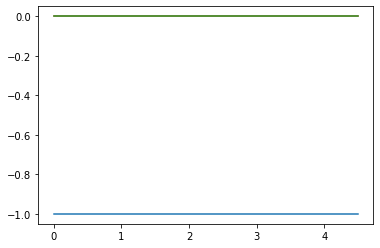

In [64]:
import numpy as np
import matplotlib.pyplot as plt

omega_photon = 1

omega_p = 1
omega_m = -1
Delta = 0.5 + 0.1j
g_list = list( j * 0.5 for j in range(0,10))

psi_list = []
Sx_list = []
Sz_list = []

for g in g_list:

    psi = -1j*(g * 2* np.real( Delta))/omega_photon
    psi = 1+1j
    psid = np.conj(psi)

    while True:
        Hj = [[omega_p,2*np.real(psi)*g],[2*np.real(psi)*g,omega_m]]
        eigenvalue , eigenvector = np.linalg.eigh(Hj)
        U = eigenvector
        Udag = np.conj(np.transpose(U))
#         Lambda = Udag @ Hj @ U
#         C = Udag @ [[1,0],[0,0]] @ U 
        C = np.outer(eigenvector[0],np.conj(eigenvector[0]))        
        psi_new = -1j*(g * 2 * np.real(C[1,0]))/omega_photon
        Sx = 2*np.real(C[1,0])
        Sz = C[0,0]-C[1,1]
        if np.abs(psi_new -psi) < 1E-5:
            psi_list.append(psi_new)
            Sz_list.append(Sz)
            Sx_list.append(Sx)
            break
        else:
            psi = psi_new
            psid = np.conj(psi_new)
            

                
print(psi_list)
plt.plot(g_list,np.abs(psi_list),linestyle='-',color='tab:red')
plt.plot(g_list,Sz_list,linestyle='-',color='tab:blue')
plt.plot(g_list,Sx_list,linestyle='-',color='tab:green')

